<a href="https://colab.research.google.com/github/Mrinalkumar1/Heart-Disease-Prediction-/blob/main/Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

According to World Health Organization, Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year. CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions. Four out of 5CVD deaths are due to heart attacks and strokes, and one third of these deaths occur prematurely in people under 70 years of age.

Individuals at risk of CVD may demonstrate raised blood pressure, glucose, and lipids as well as overweight and obesity. These can all be easily measured in primary care facilities. Identifying those at highest risk of CVDs and ensuring they receive appropriate treatment can prevent premature deaths. Access to essential noncommunicable disease medicines and basic health technologies in all primary health care facilities is essential to ensure that those in need receive treatment and counselling.

**Appendix** :
https://www.who.int/en/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)

**Dataset source reference** :
https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset/data


**About Dataset**


1. male : Whether the person is male or female
2. age  : Age of the person when he/she took the test, 0 = Female; 1 = Male
3. education : Highest education level, 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college
4. currentSmoker : Whether person is currently smoking or not, 0 = nonsmoker; 1 = smoker
5. cigsPerDay : How many cigs he/she smokes in a day. 
6. BPMeds : Whether the person takes BP meds, 0 = Not on Blood Pressure medications; 1 = Is on Blood Pressure medications
7. prevalentStroke : Has the patient got a stroke before. Yes = 1, No = 0
8. prevalentHyp : Does patient have a history of hypertension. Yes =1, No = 0
9. diabetes	: Whether person has diabetes or not, 0 = No; 1 = Yes
10. totChol	: Total cholesterol is the total amount of cholesterol in your blood. Your total cholesterol includes low-density lipoprotein (LDL, or “bad”) cholesterol and high-density lipoprotein (HDL, or “good”) cholesterol. Unit : (mg/dL)
11. sysBP	: When your heart beats, it squeezes and pushes blood through your arteries to the rest of your body. This force creates pressure on those blood vessels, and that's your systolic blood pressure. A normal systolic pressure is below 120. A reading of 140 or more means you have high blood pressure.
12. diaBP	: The diastolic reading, is the pressure in the arteries when the heart rests between beats. This is the time when the heart fills with blood and gets oxygen. A normal diastolic blood pressure is lower than 80. A reading of 90 or higher means you have high blood pressure.
13. BMI	: Body mass index. BMI = kg/m^2
14. heartRate	: Beats per minute
15. glucose	: glucose level 
16. TenYearCHD : 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”), This is our **target variable**.



In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("/content/drive/MyDrive/ML Projects /Heart disease prediction/framingham.csv")

In [4]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


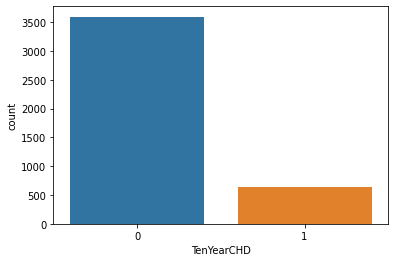

In [6]:
sns.countplot(df['TenYearCHD'])
plt.show()

**As we can see our dataset is not balanced at all hence we need to balance it in order to get an accurate prediction model. **

But first we will clean our dataset and then check the logistic regression score and then we will balance our dataset and do the same in order to see the difference. 

In [7]:
df.rename(columns={'male':'sex'},inplace=True)

In [8]:
df.info()
# As we can see there are no object dtypes here which means we don't need to use LabelEncoder or OHE.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [9]:
df.isnull().sum()

sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [10]:
for col in df: 
  print(col)
  print(df[col].unique())
  print("----"*20)

sex
[1 0]
--------------------------------------------------------------------------------
age
[39 46 48 61 43 63 45 52 50 41 38 42 44 47 60 35 36 59 54 37 56 53 49 65
 51 62 40 67 57 66 64 55 58 34 68 33 70 32 69]
--------------------------------------------------------------------------------
education
[ 4.  2.  1.  3. nan]
--------------------------------------------------------------------------------
currentSmoker
[0 1]
--------------------------------------------------------------------------------
cigsPerDay
[ 0. 20. 30. 23. 15.  9. 10.  5. 35. 43.  1. 40.  3.  2. nan 12.  4. 18.
 25. 60. 14. 45.  8. 50. 13. 11.  7.  6. 38. 29. 17. 16. 19. 70.]
--------------------------------------------------------------------------------
BPMeds
[ 0.  1. nan]
--------------------------------------------------------------------------------
prevalentStroke
[0 1]
--------------------------------------------------------------------------------
prevalentHyp
[0 1]
-----------------------------------

In [11]:
(df.isnull().sum()/df.shape[0])*100  #Percentage of null values in every column 

sex                0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64

In [12]:
#Empty column in education can mean they are uneducated so let's fill em with 0. 
df['education'].fillna(0, inplace=True)

In [13]:
#Empty column in cigsPerDay can mean people who smoke haven't updated their data. 
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(), inplace=True)

In [14]:
#Empty columns mean people who take meds haven't input it. 
df['BPMeds'].fillna(0, inplace=True)

In [15]:
df['totChol'].fillna(df['totChol'].median(), inplace=True)

In [16]:
df['BMI'].fillna(df['BMI'].median(), inplace=True)

In [17]:
df['glucose'].fillna(df['glucose'].where(df['diabetes']==0).median(), inplace=True)

In [18]:
df['heartRate'].fillna(df['heartRate'].where(df['currentSmoker']==1).median(), inplace=True)

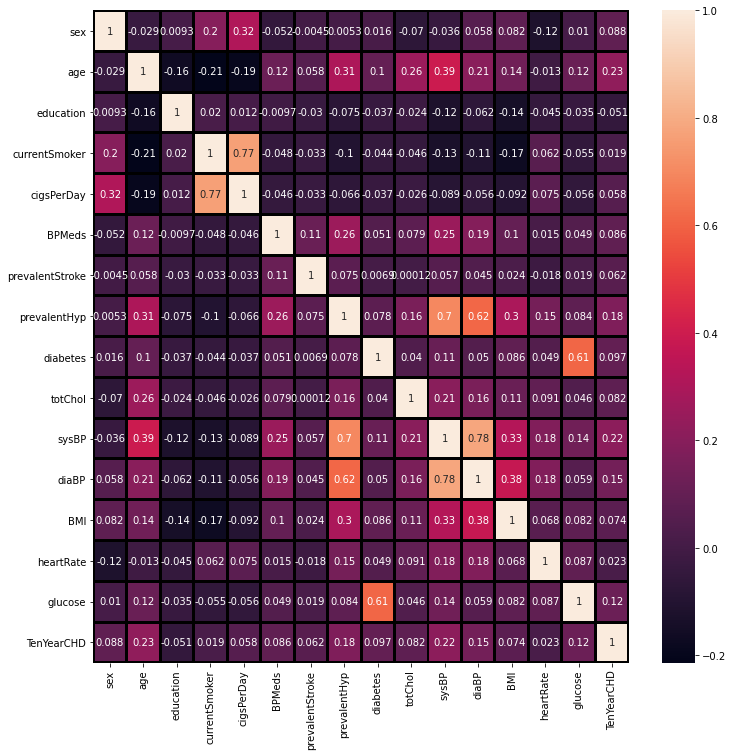

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, linewidths=2, linecolor='black')
plt.show()

In [20]:
df[(df['currentSmoker']==0) & (df['cigsPerDay']>0)]   # No such wrong data where guy isn't a smoker but cigsPerDay column is not null. 

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [21]:
(df.isnull().sum()/df.shape[0])*100  #Checking if there is any null data remaining after null value treatment

sex                0.0
age                0.0
education          0.0
currentSmoker      0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.0000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.0000,70.0
education,4238.0,1.929920,1.053018,0.00,1.00,2.0,3.0000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.0000,1.0
cigsPerDay,4238.0,9.003089,11.879230,0.00,0.00,0.0,20.0000,70.0
BPMeds,4238.0,0.029259,0.168552,0.00,0.00,0.0,0.0000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.0000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.0000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.0000,1.0
totChol,4238.0,236.689476,44.327427,107.00,206.00,234.0,262.0000,696.0


In [23]:
df.columns

Index(['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [24]:
#List of columns with continuos values so we can check outliers. 

continuous_col = ['age', 'cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

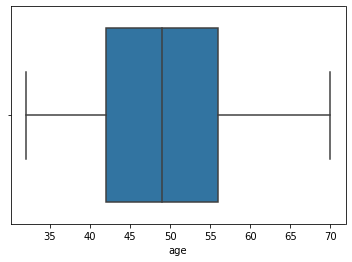

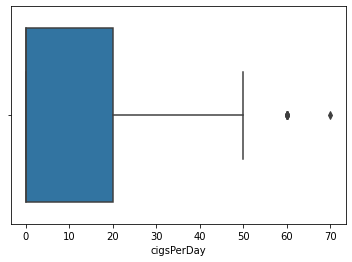

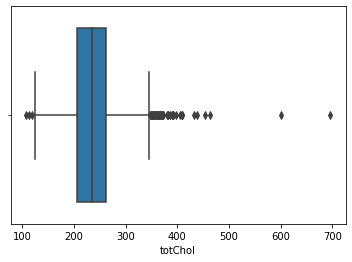

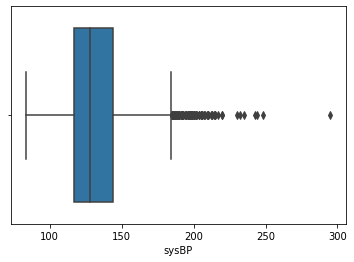

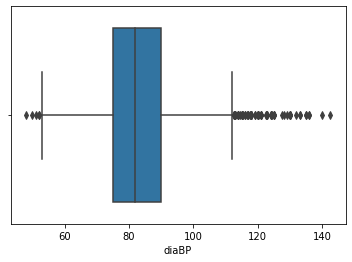

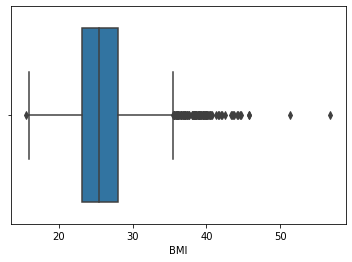

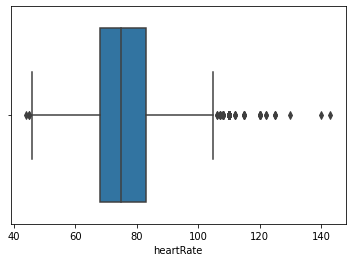

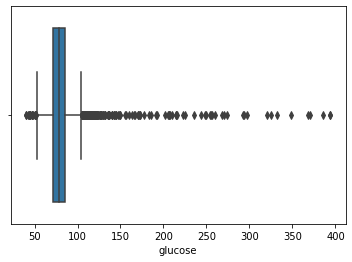

In [25]:
for col in continuous_col:
  sns.boxplot(df[col])
  plt.show()

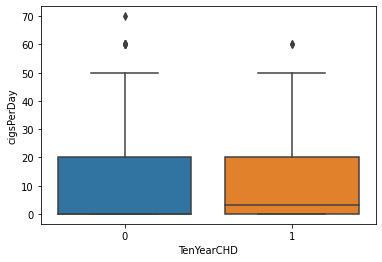

In [26]:
sns.boxplot(data=df, x='TenYearCHD', y='cigsPerDay')
plt.show()

**As we can notice there are a lot of outliers so we will have to take care of them in order to make our model effective and reliable. **

Columns with outliers : glucose, heartRate, BMI, diaBP, sysBP, totChol, cigsPerDay

Skew age = 0.22806501927587203




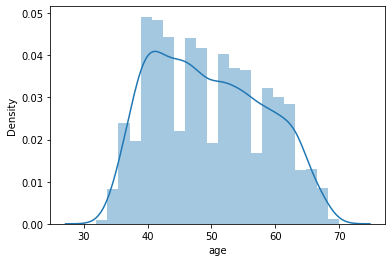

Skew cigsPerDay = 1.2517552681795452




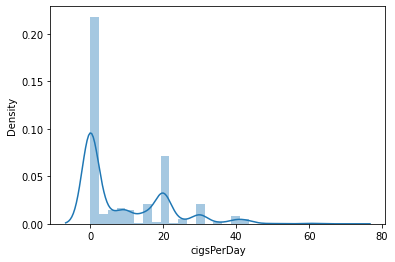

Skew totChol = 0.8784073145784838




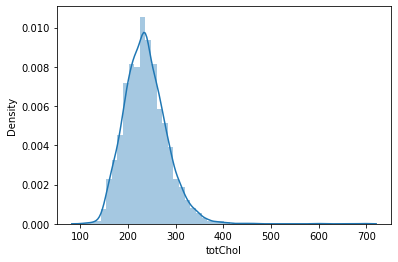

Skew sysBP = 1.1449567062594848




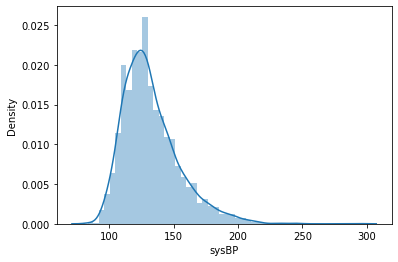

Skew diaBP = 0.7138494094062997




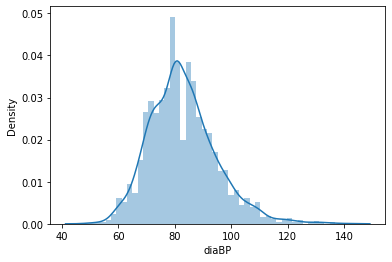

Skew BMI = 0.9850927407330611




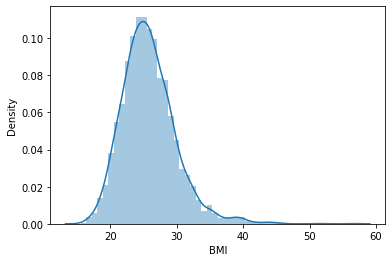

Skew heartRate = 0.6443800064756061




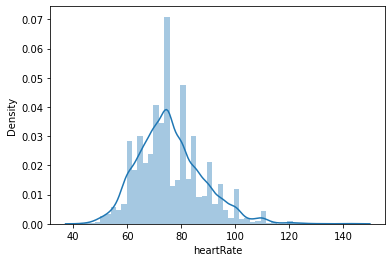

Skew glucose = 6.539160600337942




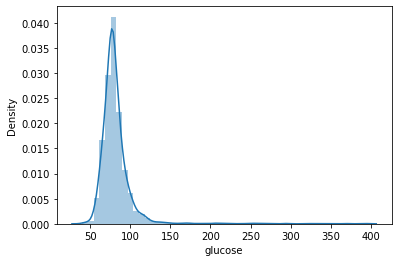

In [27]:
#To check the normal distribution of our continuous_col.

for col in continuous_col:
  print("Skew {} = {}".format(col, skew(df[col])))
  sns.distplot(df[col])
  print("\n")
  plt.show()

In [28]:
df1 = df.copy()

In [29]:
for col in continuous_col:
  q1 = np.quantile(df1[col], 0.25)
  q3 = np.quantile(df1[col], 0.75)
  iqr = q3-q1
  lower_range = q1-(iqr*1.5)
  upper_range = q3+(iqr*1.5)
  print(col)
  print("Lower range:",lower_range)
  print("Upper range:",upper_range)
  print("\n")
  df1 = df1[(df1[col]>lower_range) & (df1[col]<upper_range)]

age
Lower range: 21.0
Upper range: 77.0


cigsPerDay
Lower range: -30.0
Upper range: 50.0


totChol
Lower range: 122.0
Upper range: 346.0


sysBP
Lower range: 77.25
Upper range: 183.25


diaBP
Lower range: 52.25
Upper range: 110.25


BMI
Lower range: 15.70375
Upper range: 35.23375


heartRate
Lower range: 44.5
Upper range: 104.5


glucose
Lower range: 52.5
Upper range: 104.5




In [30]:
'''df1['age'] = df1[(df1['cigsPerDay'] < 50) & (df1['cigsPerDay'] > -30)]
df1['totChol'] = df1[(df1['totChol'] > 122) & (df1['totChol'] < 346)]
df1['sysBP'] = df1[(df1['sysBP'] > 77.25) & (df1['sysBP'] < 183.25)]
df1['diaBP'] = df1[(df1['diaBP'] > 52.25) & (df1['diaBP'] < 110.25)]
df1['BMI'] = df1[(df1['BMI'] > 15.70375) & (df1['BMI'] < 35.23375)]
df1['heartRate'] = df1[(df1['heartRate'] > 44.5) & (df1['heartRate'] < 104.5)]
df1['glucose'] = df1[(df1['glucose'] > 52.5) & (df1['glucose'] < 104.5)]'''

"df1['age'] = df1[(df1['cigsPerDay'] < 50) & (df1['cigsPerDay'] > -30)]\ndf1['totChol'] = df1[(df1['totChol'] > 122) & (df1['totChol'] < 346)]\ndf1['sysBP'] = df1[(df1['sysBP'] > 77.25) & (df1['sysBP'] < 183.25)]\ndf1['diaBP'] = df1[(df1['diaBP'] > 52.25) & (df1['diaBP'] < 110.25)]\ndf1['BMI'] = df1[(df1['BMI'] > 15.70375) & (df1['BMI'] < 35.23375)]\ndf1['heartRate'] = df1[(df1['heartRate'] > 44.5) & (df1['heartRate'] < 104.5)]\ndf1['glucose'] = df1[(df1['glucose'] > 52.5) & (df1['glucose'] < 104.5)]"

In [31]:
df1.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [32]:
print('There were {} rows before outlier treatment.'.format(df.shape[0]))
print('There are {} rows after outlier treatment.'.format(df1.shape[0]))
print('After outlier treatment number of rows lost are {}.'.format(df.shape[0] - df1.shape[0]))

There were 4238 rows before outlier treatment.
There are 3620 rows after outlier treatment.
After outlier treatment number of rows lost are 618.


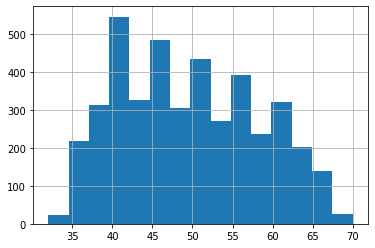

In [33]:
df['age'].hist(bins=15)
plt.show()

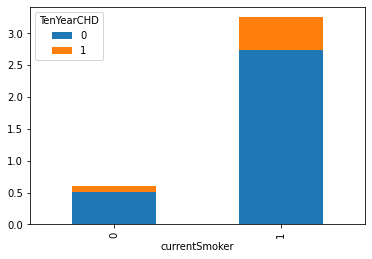

In [34]:
graph = pd.crosstab(df['currentSmoker'], df['TenYearCHD'])
graph.div(graph.sum(0).astype('float'), axis=0).plot(kind='bar', stacked=True)
plt.show()

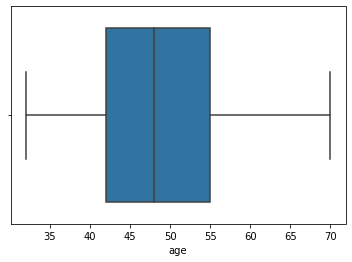

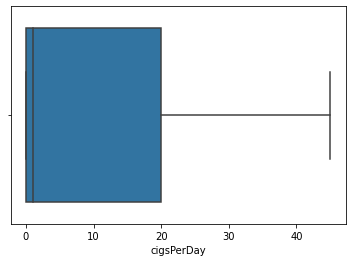

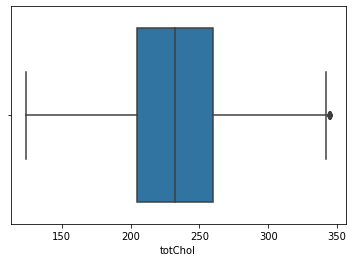

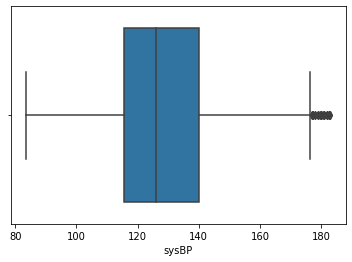

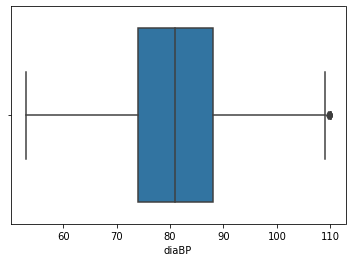

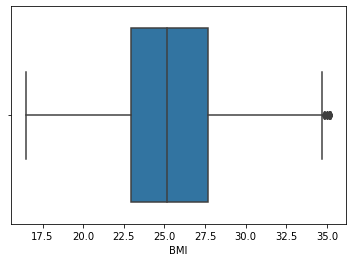

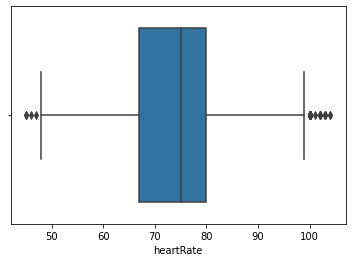

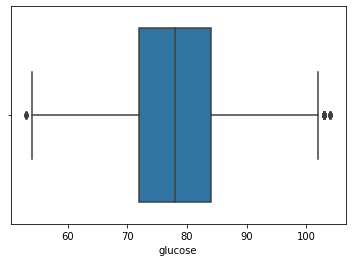

In [35]:
for col in continuous_col:
  sns.boxplot(df1[col])
  plt.show()

Skew age = 0.3029958308359904




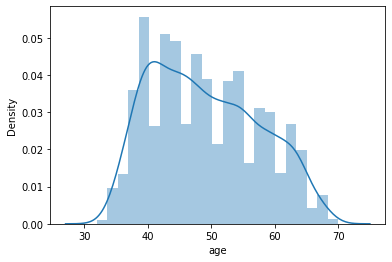

Skew cigsPerDay = 1.0750351915985203




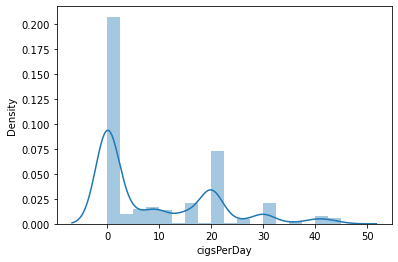

Skew totChol = 0.23679922436458123




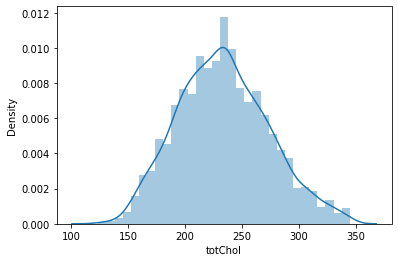

Skew sysBP = 0.609067753928063




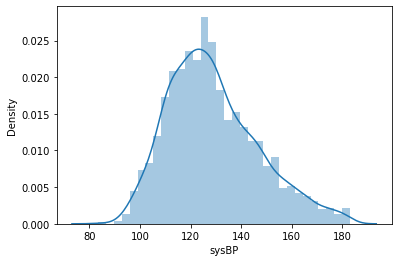

Skew diaBP = 0.2522901957956041




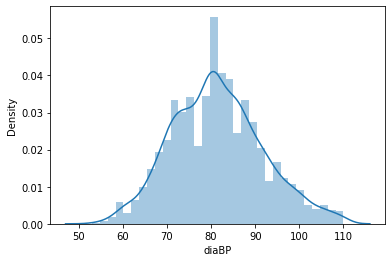

Skew BMI = 0.26708754364760307




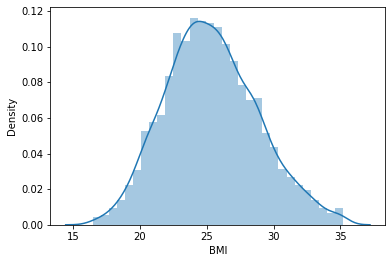

Skew heartRate = 0.2549284675774083




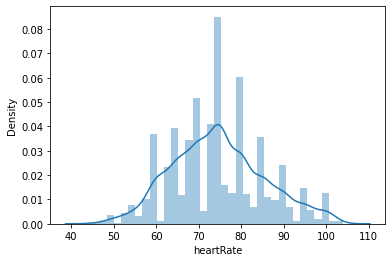

Skew glucose = 0.2822485807148535




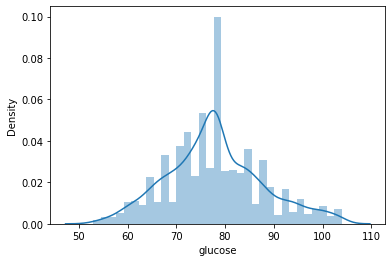

In [36]:
#To check the normal distribution of our continuous_col after removing the outliers. 

for col in continuous_col:
  print("Skew {} = {}".format(col, skew(df1[col])))
  sns.distplot(df1[col])
  print("\n")
  plt.show()

In [37]:
#Adjust the normal distribution of columns since they are not distributed very well for our model. Range of skew is -0.5 to 0.5 

#df1['cigsPerDay'] = np.sqrt(df1['cigsPerDay'])
#skew(df1['cigsPerDay'])

In [38]:
#df1['totChol'] = np.sqrt(df1['totChol'])
#skew(df1['totChol'])

In [39]:
#df1['sysBP'] = np.cbrt(df1['sysBP'])
#skew(df1['sysBP'])

In [40]:
#df1['diaBP'] = np.sqrt(df1['diaBP'])
#skew(df1['diaBP'])

In [41]:
#df1['BMI'] = np.cbrt(df1['BMI'])
#skew(df1['BMI'])  

In [42]:
#df1['heartRate'] = np.sqrt(df1['heartRate'])
#skew(df1['heartRate'])

In [43]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import chi2

In [44]:
x = df1.drop('TenYearCHD', axis=1)
y = df1['TenYearCHD']

Annova = SelectKBest(score_func=chi2, k=8)
fit = Annova.fit(x, y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)

featurescores = pd.concat([df_columns, df_scores], axis=1) #Creating a new dataset with column name and score. 
featurescores.columns = ['Specifications', 'Score']   #Naming the columns
print(featurescores.nlargest(15, 'Score'))   #Checking score of 13 best features based on their score. 

     Specifications       Score
4        cigsPerDay  265.830401
10            sysBP  260.690443
1               age  241.038715
9           totChol  122.892457
7      prevalentHyp   53.869605
11            diaBP   44.813379
0               sex   20.572983
6   prevalentStroke   15.112445
5            BPMeds    7.770997
12              BMI    5.645551
2         education    4.183609
3     currentSmoker    1.946936
13        heartRate    0.612689
8          diabetes    0.100801
14          glucose    0.068451


In [45]:
featurescores = featurescores.sort_values(by='Score', ascending=False)

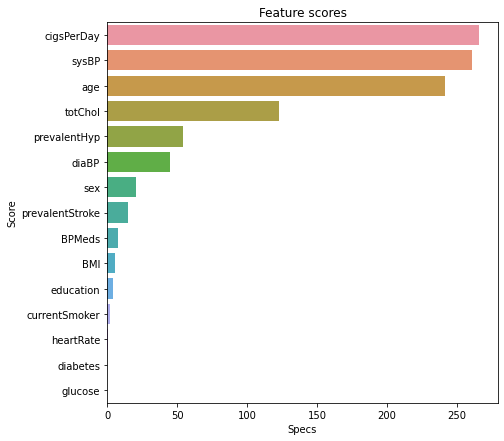

In [46]:
plt.figure(figsize=(7,7))
sns.barplot(data=featurescores, x='Score', y='Specifications')
plt.title('Feature scores')
plt.xlabel('Specs')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

In [47]:
# Now lets make a list of our top 8 columns
feature_list = featurescores['Specifications'].tolist()[:8]
feature_list

['cigsPerDay',
 'sysBP',
 'age',
 'totChol',
 'prevalentHyp',
 'diaBP',
 'sex',
 'prevalentStroke']

In [48]:
df2 = df1[feature_list]
df2['TenYearCHD'] = df1['TenYearCHD']
df2.head()

,cigsPerDay,sysBP,age,totChol,prevalentHyp,diaBP,sex,prevalentStroke,TenYearCHD
0,0.0,106.0,39,195.0,0,70.0,1,0,0
1,0.0,121.0,46,250.0,0,81.0,0,0,0
2,20.0,127.5,48,245.0,0,80.0,1,0,0
3,30.0,150.0,61,225.0,1,95.0,0,0,1
4,23.0,130.0,46,285.0,0,84.0,0,0,0


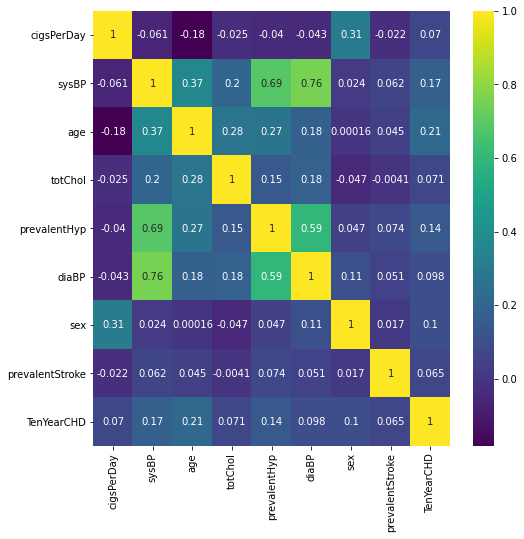

In [49]:
plt.figure(figsize=(8,8))
sns.heatmap(df2.corr(), annot=True, cmap='viridis', linewidth=0)
plt.show()

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
logr = LogisticRegression(solver='liblinear', fit_intercept=True)
x1 = df2.drop(['TenYearCHD'], axis=1)
y1 = df2['TenYearCHD']

x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3)
logr.fit(x_train, y_train)
y_predict = logr.predict(x_test)
logr.score(x_test, y_test)

0.8830570902394107

In [51]:
from sklearn.metrics import (confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, classification_report)

In [52]:
(tn, fp), (fn, tp) = confusion_matrix(y_test, y_predict)
print(tp, fp)
print(fn, tn)

2 0
139 945


In [53]:
print("Accuracy score: ",accuracy_score(y_test, y_predict))
print("Precision score: ",precision_score(y_test, y_predict))
print("Recall score: ",recall_score(y_test, y_predict))
print("f1_score: ",f1_score(y_test, y_predict))
print("\nClassification report\n",classification_report(y_test, y_predict))

Accuracy score:  0.8720073664825047
Precision score:  1.0
Recall score:  0.014184397163120567
f1_score:  0.027972027972027972

Classification report
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       945
           1       1.00      0.01      0.03       141

    accuracy                           0.87      1086
   macro avg       0.94      0.51      0.48      1086
weighted avg       0.89      0.87      0.81      1086



Our f1 score for 0 is great but for 1 its almost 0 hence we need to balance the dataset like we talked about in the very beginning. 

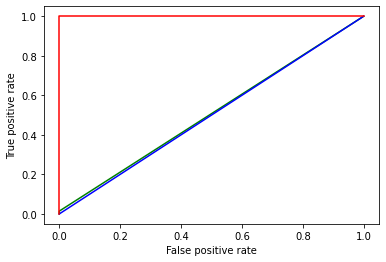

In [54]:
fpr, tpr, thres = roc_curve(y_test, y_predict)
plt.plot(fpr, tpr, 'g-')
plt.plot([0,1], [0,1], 'b-')
plt.plot([0,0,1], [0,1,1], 'r-')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [55]:
roc_auc_score(y_test, y_predict)

0.5070921985815603

**Forward and Backward selection of features in order to identify how many features are exactly perfect for this scenario.**

In [56]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [57]:
sfs = SequentialFeatureSelector(LogisticRegression(), k_features=8, forward=True, scoring='r2', cv=5, n_jobs=5)
sfs.fit(x,y)
sfs.k_feature_names_ #top 8 columns 

('sex',
 'age',
 'cigsPerDay',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'sysBP',
 'heartRate')

In [58]:
x_fwd = df1[list(sfs.k_feature_names_)]
y_fwd = df1['TenYearCHD']

x_fwd_train, x_fwd_test, y_fwd_train, y_fwd_test = train_test_split(x_fwd, y_fwd, test_size=0.25)
lr = LogisticRegression()
lr.fit(x_fwd_train, y_fwd_train)
lr.score(x_fwd_test, y_fwd_test)

0.8685082872928177

In [59]:
d = {}
for i in range(1,8):
  sfs = SequentialFeatureSelector(LogisticRegression(), k_features=i, cv=5, n_jobs=1, forward=True, scoring='r2', verbose=2)
  sfs.fit(x,y)
  x_fwd = df1[list(sfs.k_feature_names_)]
  y_fwd = df1['TenYearCHD']
  x_fwd_train, x_fwd_test, y_fwd_train, y_fwd_test = train_test_split(x_fwd, y_fwd, test_size=0.25)

  lr = LogisticRegression()
  lr.fit(x_fwd_train, y_fwd_train)
  print(i, lr.score(x_fwd_test, y_fwd_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.8s finished

[2020-12-22 02:10:45] Features: 1/1 -- score: -0.15360172289438126[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


1 0.8530386740331491


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.8s finished

[2020-12-22 02:10:46] Features: 1/2 -- score: -0.15360172289438126[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.0s finished

[2020-12-22 02:10:47] Features: 2/2 -- score: -0.15360172289438126[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


2 0.8640883977900552


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.8s finished

[2020-12-22 02:10:48] Features: 1/3 -- score: -0.15360172289438126[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.9s finished

[2020-12-22 02:10:49] Features: 2/3 -- score: -0.15360172289438126[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.4s finished

[2020-12-22 02:10:50] Features: 3/3 -- score: -0.14639630888164237[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


3 0.8861878453038674


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.8s finished

[2020-12-22 02:10:51] Features: 1/4 -- score: -0.15360172289438126[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.9s finished

[2020-12-22 02:10:52] Features: 2/4 -- score: -0.15360172289438126[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.4s finished

[2020-12-22 02:10:53] Features: 3/4 -- score: -0.14639630888164237[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    2.5s finished

[2020-12-22 02:10:56] Features: 4/4

4 0.8596685082872928


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.8s finished

[2020-12-22 02:10:57] Features: 1/5 -- score: -0.15360172289438126[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.9s finished

[2020-12-22 02:10:58] Features: 2/5 -- score: -0.15360172289438126[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.5s finished

[2020-12-22 02:10:59] Features: 3/5 -- score: -0.14639630888164237[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    2.5s finished

[2020-12-22 02:11:02] Features: 4/5

5 0.8729281767955801


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.9s finished

[2020-12-22 02:11:05] Features: 1/6 -- score: -0.15360172289438126[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.9s finished

[2020-12-22 02:11:06] Features: 2/6 -- score: -0.15360172289438126[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.5s finished

[2020-12-22 02:11:08] Features: 3/6 -- score: -0.14639630888164237[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    2.5s finished

[2020-12-22 02:11:10] Features: 4/6

6 0.8674033149171271


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.9s finished

[2020-12-22 02:11:17] Features: 1/7 -- score: -0.15360172289438126[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.0s finished

[2020-12-22 02:11:18] Features: 2/7 -- score: -0.15360172289438126[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.5s finished

[2020-12-22 02:11:19] Features: 3/7 -- score: -0.14639630888164237[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    2.4s finished

[2020-12-22 02:11:22] Features: 4/7

7 0.8828729281767956


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.3s finished

[2020-12-22 02:11:31] Features: 7/7 -- score: -0.12960464591971393

In [60]:
d = {}
for i in range(8,1,-1):
  sfs = SequentialFeatureSelector(LogisticRegression(), k_features=i, cv=5, n_jobs=1, forward=True, scoring='r2',verbose=2)
  sfs.fit(x,y)

  x_bwd = df1[list(sfs.k_feature_names_)]
  y_bwd = df1['TenYearCHD']
  x_bwd_train, x_bwd_test, y_bwd_train, y_bwd_test = train_test_split(x_bwd, y_bwd, test_size=0.25)

  lr = LogisticRegression()
  lr.fit(x_bwd_train, y_bwd_train)
  d.setdefault(i, lr.score(x_bwd_test, y_bwd_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.8s finished

[2020-12-22 02:11:32] Features: 1/8 -- score: -0.15360172289438126[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.0s finished

[2020-12-22 02:11:33] Features: 2/8 -- score: -0.15360172289438126[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.5s finished

[2020-12-22 02:11:34] Features: 3/8 -- score: -0.14639630888164237[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [61]:
for k, v in d.items():
  print(k, v)

8 0.8519337016574585
7 0.876243093922652
6 0.8640883977900552
5 0.8696132596685083
4 0.8629834254143647
3 0.8806629834254144
2 0.8674033149171271


**So from the Forward and Backward selection test we realize that it'll be in our best interest to choose all the top 8 columns since the difference between r2 score with 8 columns and 5 columns is very small.**

**Also, the Annova test helped us to select the top 8 columsn which make a difference in the r2_score and for our model we are going to rely on the Annova test scores. r2_score = 0.877-0.884**

In [88]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [89]:
smote = SMOTE(random_state=1,   )
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_sm))

Resampled dataset shape Counter({0: 2180, 1: 2180})


In [90]:
log_sm = LogisticRegression(solver='liblinear', fit_intercept=True)
log_sm.fit(x_train_sm, y_train_sm)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
y_pred_train = log_sm.predict(x_train_sm)
y_pred_test = log_sm.predict(x_test)

print("\nConfusion matrix-Train:\n",confusion_matrix(y_train_sm, y_pred_train))
print("\nOverall accuracy-Train:\n",accuracy_score(y_train_sm, y_pred_train))

print("\nConfusion matrix-Test:\n",confusion_matrix(y_test, y_pred_test))
print("\nOverall accuracy-Test:\n",accuracy_score(y_test, y_pred_test))
print("\nClassification report:\n",classification_report(y_test, y_pred_test))
print("Score")


Confusion matrix-Train:
 [[1442  738]
 [ 672 1508]]

Overall accuracy-Train:
 0.676605504587156

Confusion matrix-Test:
 [[636 322]
 [ 44  84]]

Overall accuracy-Test:
 0.6629834254143646

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.66      0.78       958
           1       0.21      0.66      0.31       128

    accuracy                           0.66      1086
   macro avg       0.57      0.66      0.55      1086
weighted avg       0.85      0.66      0.72      1086

Score


In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc.score(x_test, y_test)

0.7670349907918969

In [94]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train_sm, y_train_sm)
dtc.score(x_test, y_test)

0.7523020257826888

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
for i in range(1,10):
  knc = KNeighborsClassifier(n_neighbors=i)
  knc.fit(x_train, y_train)
  print(i, knc.score(x_test, y_test))

1 0.7937384898710865
2 0.8655616942909761
3 0.8379373848987108
4 0.8664825046040515
5 0.8627992633517495
6 0.8747697974217311
7 0.8701657458563536
8 0.8793738489871087
9 0.8802946593001841


In [97]:
for i in range(1,10):
  knc = KNeighborsClassifier(n_neighbors=i)
  knc.fit(x_train_sm, y_train_sm)
  print(i, knc.score(x_test, y_test))

1 0.7412523020257827
2 0.7790055248618785
3 0.6915285451197053
4 0.7246777163904236
5 0.6583793738489871
6 0.6933701657458563
7 0.651012891344383
8 0.6823204419889503
9 0.643646408839779


In [98]:
#Final model 
KNC = KNeighborsClassifier(n_neighbors=2)
KNC.fit(x_train_sm, y_train_sm)
print("Score:",KNC.score(x_test, y_test))
y_pred_knc=KNC.predict(x_test)
print("\nClassification report:\n",classification_report(y_test, y_pred_knc))

Score: 0.7790055248618785

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.87       958
           1       0.19      0.27      0.22       128

    accuracy                           0.78      1086
   macro avg       0.54      0.56      0.55      1086
weighted avg       0.81      0.78      0.79      1086



As we notice both KNeighborsClassifier and DecisionTreeClassifier are giving really high r2_score when we are using oversampled dataset.

---



**Result : KNC and DTC both are really good for modelling but we will choose to go with KNC with n_neighbors = 2 since it is giving is the best output scores.**












In [100]:
def pred_heart_disease():
  predic_columns = []
  columns = ['cigsPerDay',
              'sysBP',
              'age',
              'totChol',
              'prevalentHyp',
              'diaBP',
              'sex',
              'prevalentStroke']
  print("Input the patients information: ")

  cigs = int(input("Enter the number of cigs per day in number: "))
  predic_columns.append(cigs)
  sysBP = input("Enter the sysBP of the patient: ")
  predic_columns.append(sysBP)
  age = int(input("Enter the patients age: "))
  predic_columns.append(age)
  totChol = int(input("Enter the cholestrol: "))
  predic_columns.append(totChol)
  prevalentHyp = int(input("Enter prevalent hyp: "))
  predic_columns.append(prevalentHyp)
  diaBP = int(input("Enter the diaBP: "))
  predic_columns.append(diaBP)
  sex = int(input("Enter the sex: male=1, female=0: "))
  predic_columns.append(sex)
  prevalentStroke = int(input("Enter if patient has a history of prevalent stroke: "))
  predic_columns.append(prevalentStroke)
  
  patient_data = dict(zip(columns, predic_columns))
  df3 = pd.DataFrame(patient_data, index=[0])
  prediction = KNC.predict(df3)
  print("\n")
  print("Result: ")
  if prediction==1:
    print("patient will develop a heart disease.")
  else:
    print("patient will not develop a heart disease.")
pred_heart_disease()

Input the patients information: 
Enter the number of cigs per day in number: 30
Enter the sysBP of the patient: 150
Enter the patients age: 61
Enter the cholestrol: 225
Enter prevalent hyp: 1
Enter the diaBP: 95
Enter the sex: male=1, female=0: 0
Enter if patient has a history of prevalent stroke: 0


Result: 
patient will develop a heart disease.
